<a href="https://colab.research.google.com/github/kamilpopowski/aaa/blob/master/Konwolucyjna_sie%C4%87_neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D #flaten wyplaszczy dane z obraskow, Conv2D odpowiedzialna za konwolucje, maxpooling za maxpooling

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print('liczba danych treningowych: ', x_train.shape[0])
print('liczba danych testowych: ', x_test.shape[0])
print('rozmiar pojedynczego obrazka: ', x_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
liczba danych treningowych:  60000
liczba danych testowych:  10000
rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

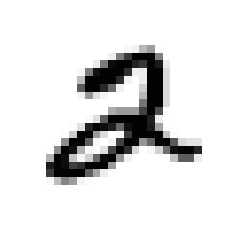

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5], cmap='Greys')
plt.axis('off')

In [36]:
print(keras.backend.image_data_format()) #sposób zapisu danych w naszych obrazkach

channels_last


In [40]:
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channel_first': #przeksztalcamy dane tak aby na 1 miejscu byla liczba próbek (60k), pozniej liczbe kanalow (1) i rozmiar obrazka
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

print(input_shape)

(28, 28, 1)


In [41]:
x_train = x_train.astype('float32') #przekonwertowanie dancyh na typ float
x_test = x_test.astype('float32')

x_train /= 255 #wystandaryzowanie danych (przedział 0 - 1)
x_test /= 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [43]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)#przekształcenie labeli na wektory, w których 1 będzie na miejscu odpowiadajacemu cyfrze na obrazie
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10, 10)
(10000, 10)


In [44]:
y_train[0:10]

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [45]:
model = Sequential()
#dodawanie warstw w procesie budowy architektury sieci
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape =(28,28,1))) #folters - liczba filtrow, ktorych nauczy sie sieć, kernel_size - rozmiar filtru; 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #kolejna warstwa konwolucji, niech mieli 
model.add(MaxPooling2D(pool_size=(2, 2))) #maxpooling zmniejszy złożoność problemu; pool_size - rozmiar okna ekstrakcji, którym latamy po obrazkach
model.add(Flatten()) #spłaszcza wszystko (macież staje sie jednokolumnowa)
model.add(Dense(units=128, activation='relu')) #Dense przyjmuje wartość neuronów
model.add(Dense(units=10, activation='softmax')) #softmax wyrzuci prawdopodobieństwa wyliczonych klas

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
________________________________________

In [46]:
model.compile(optimizer='adadelta', 
              loss='categorical_crossentropy',
              metrics=['accuracy']) #skompilowanie modelu; optimizer - optymalizator, loss - funkcja straty

In [0]:
#pierwsze sa dane treningowe, batch_size -rozmiar po ktorym wagi beda aktualizowane, epochs - ile razy siec przemieli cale dane, validation_data - argument to dane testowe
his = model.fit(x_train, y_train, batch_size=128 epochs=20, validation_data=(x_test, y_test))